<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Import-all-the-necessary-libraries-here:" data-toc-modified-id="Import-all-the-necessary-libraries-here:-0.0.1"><span class="toc-item-num">0.0.1&nbsp;&nbsp;</span>Import all the necessary libraries here:</a></span></li></ul></li></ul></li><li><span><a href="#Challenge-1" data-toc-modified-id="Challenge-1-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Challenge 1</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#The-data-we-will-use-in-this-challenge-is:" data-toc-modified-id="The-data-we-will-use-in-this-challenge-is:-1.0.1"><span class="toc-item-num">1.0.1&nbsp;&nbsp;</span>The data we will use in this challenge is:</a></span></li><li><span><a href="#Plot-(x,-y)-and-(x,-z)." data-toc-modified-id="Plot-(x,-y)-and-(x,-z).-1.0.2"><span class="toc-item-num">1.0.2&nbsp;&nbsp;</span>Plot (x, y) and (x, z).</a></span></li><li><span><a href="#Use-plt.subplots(nrows=1,-ncols=2)-to-create-the-plot." data-toc-modified-id="Use-plt.subplots(nrows=1,-ncols=2)-to-create-the-plot.-1.0.3"><span class="toc-item-num">1.0.3&nbsp;&nbsp;</span>Use plt.subplots(nrows=1, ncols=2) to create the plot.</a></span></li><li><span><a href="#Use-your-previous-code-but-now,-resize-your-plot." data-toc-modified-id="Use-your-previous-code-but-now,-resize-your-plot.-1.0.4"><span class="toc-item-num">1.0.4&nbsp;&nbsp;</span>Use your previous code but now, resize your plot.</a></span></li><li><span><a href="#Now-you-will-have-to-plot-both-$y=x^2$-and-$y=e^x$-in-the-same-plot.-Create-two-subplots-and-use-a-normal-scale-in-the-first-one-and-a-logarithmic-scale-in-the-second-one." data-toc-modified-id="Now-you-will-have-to-plot-both-$y=x^2$-and-$y=e^x$-in-the-same-plot.-Create-two-subplots-and-use-a-normal-scale-in-the-first-one-and-a-logarithmic-scale-in-the-second-one.-1.0.5"><span class="toc-item-num">1.0.5&nbsp;&nbsp;</span>Now you will have to plot both $y=x^2$ and $y=e^x$ in the same plot. Create two subplots and use a normal scale in the first one and a logarithmic scale in the second one.</a></span></li><li><span><a href="#As-a-bonus-challenge,-try-to-add-a-legend-to-the-plot." data-toc-modified-id="As-a-bonus-challenge,-try-to-add-a-legend-to-the-plot.-1.0.6"><span class="toc-item-num">1.0.6&nbsp;&nbsp;</span>As a bonus challenge, try to add a legend to the plot.</a></span></li></ul></li></ul></li><li><span><a href="#Challenge-2" data-toc-modified-id="Challenge-2-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Challenge 2</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Import-the-Fitbit2-dataset-and-store-it-in-a-variable-called-fitbit.-You-can-find-the-dataset-in-Ironhack's-database:" data-toc-modified-id="Import-the-Fitbit2-dataset-and-store-it-in-a-variable-called-fitbit.-You-can-find-the-dataset-in-Ironhack's-database:-2.0.1"><span class="toc-item-num">2.0.1&nbsp;&nbsp;</span>Import the <code>Fitbit2</code> dataset and store it in a variable called <code>fitbit</code>. You can find the dataset in Ironhack's database:</a></span></li><li><span><a href="#From-the-Fitbit-data,-we-want-to-visually-understand:" data-toc-modified-id="From-the-Fitbit-data,-we-want-to-visually-understand:-2.0.2"><span class="toc-item-num">2.0.2&nbsp;&nbsp;</span>From the Fitbit data, we want to visually understand:</a></span></li><li><span><a href="#Write-a-loop-to-plot-3-scatter-plots-of-the-following-features:" data-toc-modified-id="Write-a-loop-to-plot-3-scatter-plots-of-the-following-features:-2.0.3"><span class="toc-item-num">2.0.3&nbsp;&nbsp;</span>Write a loop to plot 3 scatter plots of the following features:</a></span></li></ul></li></ul></li><li><span><a href="#Challenge-3" data-toc-modified-id="Challenge-3-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Challenge 3</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Import-the-titanic-dataset-and-store-it-in-a-variable-called-titanic.-You-can-find-the-dataset-in-Ironhack's-database:" data-toc-modified-id="Import-the-titanic-dataset-and-store-it-in-a-variable-called-titanic.-You-can-find-the-dataset-in-Ironhack's-database:-3.0.1"><span class="toc-item-num">3.0.1&nbsp;&nbsp;</span>Import the <code>titanic</code> dataset and store it in a variable called <code>titanic</code>. You can find the dataset in Ironhack's database:</a></span></li><li><span><a href="#Explore-the-titanic-dataset-using-Pandas-dtypes." data-toc-modified-id="Explore-the-titanic-dataset-using-Pandas-dtypes.-3.0.2"><span class="toc-item-num">3.0.2&nbsp;&nbsp;</span>Explore the titanic dataset using Pandas dtypes.</a></span></li><li><span><a href="#What-are-your-numerical-variables?-What-are-your-categorical-variables?" data-toc-modified-id="What-are-your-numerical-variables?-What-are-your-categorical-variables?-3.0.3"><span class="toc-item-num">3.0.3&nbsp;&nbsp;</span>What are your numerical variables? What are your categorical variables?</a></span></li><li><span><a href="#Set-the-plot-style-to-classic-and-the-figure-size-to-(12,6)." data-toc-modified-id="Set-the-plot-style-to-classic-and-the-figure-size-to-(12,6).-3.0.4"><span class="toc-item-num">3.0.4&nbsp;&nbsp;</span>Set the plot style to classic and the figure size to (12,6).</a></span></li><li><span><a href="#Use-the-right-visulalization-to-show-the-distribution-of-column-Age." data-toc-modified-id="Use-the-right-visulalization-to-show-the-distribution-of-column-Age.-3.0.5"><span class="toc-item-num">3.0.5&nbsp;&nbsp;</span>Use the right visulalization to show the distribution of column <code>Age</code>.</a></span></li><li><span><a href="#Use-subplots-and-plot-the-distribution-of-the-Age--with-bins-equal-to-10,-20-and-50." data-toc-modified-id="Use-subplots-and-plot-the-distribution-of-the-Age--with-bins-equal-to-10,-20-and-50.-3.0.6"><span class="toc-item-num">3.0.6&nbsp;&nbsp;</span>Use subplots and plot the distribution of the <code>Age</code>  with bins equal to 10, 20 and 50.</a></span></li><li><span><a href="#How-does-the-bin-size-affect-your-plot?" data-toc-modified-id="How-does-the-bin-size-affect-your-plot?-3.0.7"><span class="toc-item-num">3.0.7&nbsp;&nbsp;</span>How does the bin size affect your plot?</a></span></li><li><span><a href="#Use-seaborn-to-show-the-distribution-of-column-Age." data-toc-modified-id="Use-seaborn-to-show-the-distribution-of-column-Age.-3.0.8"><span class="toc-item-num">3.0.8&nbsp;&nbsp;</span>Use seaborn to show the distribution of column <code>Age</code>.</a></span></li><li><span><a href="#Use-the-right-plot-to-visualize-column-Gender.-There-are-2-ways-of-doing-it.-Do-it-both-ways." data-toc-modified-id="Use-the-right-plot-to-visualize-column-Gender.-There-are-2-ways-of-doing-it.-Do-it-both-ways.-3.0.9"><span class="toc-item-num">3.0.9&nbsp;&nbsp;</span>Use the right plot to visualize column <code>Gender</code>. There are 2 ways of doing it. Do it both ways.</a></span></li><li><span><a href="#Use-the-right-plot-to-visualize-the-column-Pclass." data-toc-modified-id="Use-the-right-plot-to-visualize-the-column-Pclass.-3.0.10"><span class="toc-item-num">3.0.10&nbsp;&nbsp;</span>Use the right plot to visualize the column <code>Pclass</code>.</a></span></li><li><span><a href="#We-would-like-to-have-in-one-single-plot-the-summary-statistics-of-the-feature-Age.-What-kind-of-plot-would-you-use?-Plot-it." data-toc-modified-id="We-would-like-to-have-in-one-single-plot-the-summary-statistics-of-the-feature-Age.-What-kind-of-plot-would-you-use?-Plot-it.-3.0.11"><span class="toc-item-num">3.0.11&nbsp;&nbsp;</span>We would like to have in one single plot the summary statistics of the feature <code>Age</code>. What kind of plot would you use? Plot it.</a></span></li><li><span><a href="#What-does-the-last-plot-tell-you-about-the-feature-Age?" data-toc-modified-id="What-does-the-last-plot-tell-you-about-the-feature-Age?-3.0.12"><span class="toc-item-num">3.0.12&nbsp;&nbsp;</span>What does the last plot tell you about the feature <code>Age</code>?</a></span></li><li><span><a href="#Now-in-addition-to-the-summary-statistics,-we-want-to-have-in-the-same-plot-the-distribution-of-Age.-What-kind-of-plot-would-you-use?-Plot-it." data-toc-modified-id="Now-in-addition-to-the-summary-statistics,-we-want-to-have-in-the-same-plot-the-distribution-of-Age.-What-kind-of-plot-would-you-use?-Plot-it.-3.0.13"><span class="toc-item-num">3.0.13&nbsp;&nbsp;</span>Now in addition to the summary statistics, we want to have in the same plot the distribution of <code>Age</code>. What kind of plot would you use? Plot it.</a></span></li><li><span><a href="#What-additional-information-does-the-last-plot-provide-about-feature-Age?" data-toc-modified-id="What-additional-information-does-the-last-plot-provide-about-feature-Age?-3.0.14"><span class="toc-item-num">3.0.14&nbsp;&nbsp;</span>What additional information does the last plot provide about feature <code>Age</code>?</a></span></li><li><span><a href="#We-suspect-that-there-is-a-linear-relationship-between-Fare-and-Age.-Use-the-right-plot-to-show-the-relationship-between-these-2-features.-There-are-2-ways,-please-do-it-both-ways." data-toc-modified-id="We-suspect-that-there-is-a-linear-relationship-between-Fare-and-Age.-Use-the-right-plot-to-show-the-relationship-between-these-2-features.-There-are-2-ways,-please-do-it-both-ways.-3.0.15"><span class="toc-item-num">3.0.15&nbsp;&nbsp;</span>We suspect that there is a linear relationship between <code>Fare</code> and <code>Age</code>. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.</a></span></li><li><span><a href="#Plot-the-correlation-matrix-using-seaborn." data-toc-modified-id="Plot-the-correlation-matrix-using-seaborn.-3.0.16"><span class="toc-item-num">3.0.16&nbsp;&nbsp;</span>Plot the correlation matrix using seaborn.</a></span></li><li><span><a href="#What-are-the-most-correlated-features?" data-toc-modified-id="What-are-the-most-correlated-features?-3.0.17"><span class="toc-item-num">3.0.17&nbsp;&nbsp;</span>What are the most correlated features?</a></span></li><li><span><a href="#Use-the-most-appropriate-plot-to-display-the-summary-statistics-of-Age-depending-on-Pclass." data-toc-modified-id="Use-the-most-appropriate-plot-to-display-the-summary-statistics-of-Age-depending-on-Pclass.-3.0.18"><span class="toc-item-num">3.0.18&nbsp;&nbsp;</span>Use the most appropriate plot to display the summary statistics of <code>Age</code> depending on <code>Pclass</code>.</a></span></li><li><span><a href="#Use-seaborn-to-plot-the-distribution-of-Age-based-on-the-Gender." data-toc-modified-id="Use-seaborn-to-plot-the-distribution-of-Age-based-on-the-Gender.-3.0.19"><span class="toc-item-num">3.0.19&nbsp;&nbsp;</span>Use seaborn to plot the distribution of <code>Age</code> based on the <code>Gender</code>.</a></span></li></ul></li></ul></li></ul></div>

# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

## Challenge 1

#### The data we will use in this challenge is:

In [4]:
x = np.arange(0,100)
y = x*2
z = x**2

#### Plot (x, y) and (x, z).
There are 2 ways of doing this. Do in both ways.

**Hint**: Check out the nrows, ncols and index arguments of subplots. 

Also, play around with the linewidth and style. Use the ones you're most happy with.

In [5]:
#to check the different styles
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

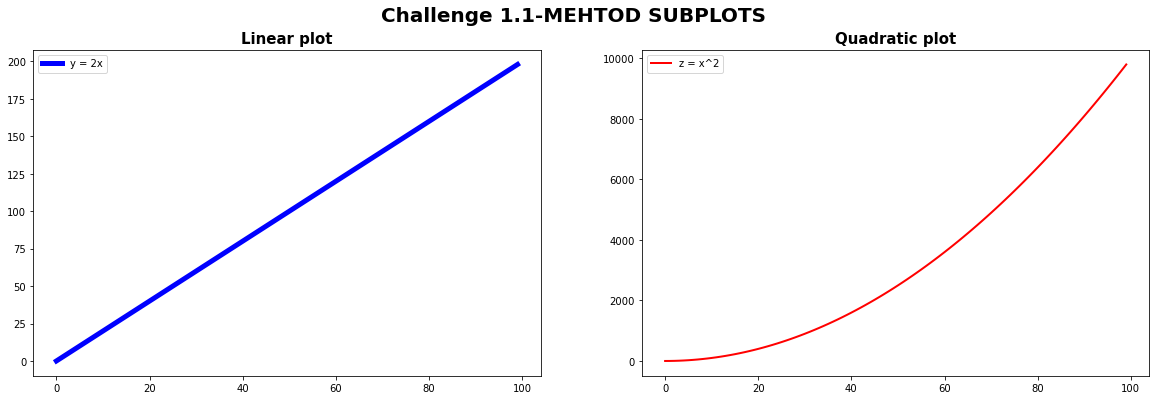

In [6]:
### METHOD 1 : with subplots
#it will be for the whole session, otherwise you hav to use the statement with.

fig, ax = plt.subplots(1,2,figsize = (20,6))
fig.suptitle('Challenge 1.1-MEHTOD SUBPLOTS', fontsize=20, fontweight='bold')


# create first plot (left), adding a title
ax[0].plot(x,y, c='blue', label='y = 2x',linewidth = 5)
ax[0].set_title('Linear plot', fontsize=15,fontweight='semibold',)

# create second plot (centre), adding a title
ax[1].plot(x,z, color='red', label='z = x^2',linewidth = 2 )
ax[1].set_title('Quadratic plot', fontsize=15,fontweight='semibold')



# add grids 
ax[0].grid(True, color='w', linestyle='solid')
ax[1].grid(True, color='w', linestyle='solid')

ax[0].legend(loc = 'upper left')
ax[1].legend(loc = 'upper left')

# for a in ax:
#     a.legend(loc = 'upper left')

#### Use plt.subplots(nrows=1, ncols=2) to create the plot.

In [ ]:
##METHOD 2: now with subplot

plt.figure(figsize = (12,10))

plt.subplot(1,2,1)
plt.suptitle('Challenge 1.1- METHOD SUBPLOT', fontsize=18)

plt.title('Linear Plot', fontsize=18)
plt.plot(x,y, label='y = 2x')
plt.legend()
plt.grid(True, linestyle='-.')

plt.subplot(1,2,2)
plt.title('Quadratic plot', fontsize=18)
plt.plot(x,z, label='z = x**2')
plt.legend()
plt.grid(True, linestyle='-.')


#### Use your previous code but now, resize your plot.
**Hint**: Add the figsize argument in plt.subplots().

If you want, try to add a title to the plot or even axes labels. You can also play with the fontweight and fontsize of the titles and labels. 

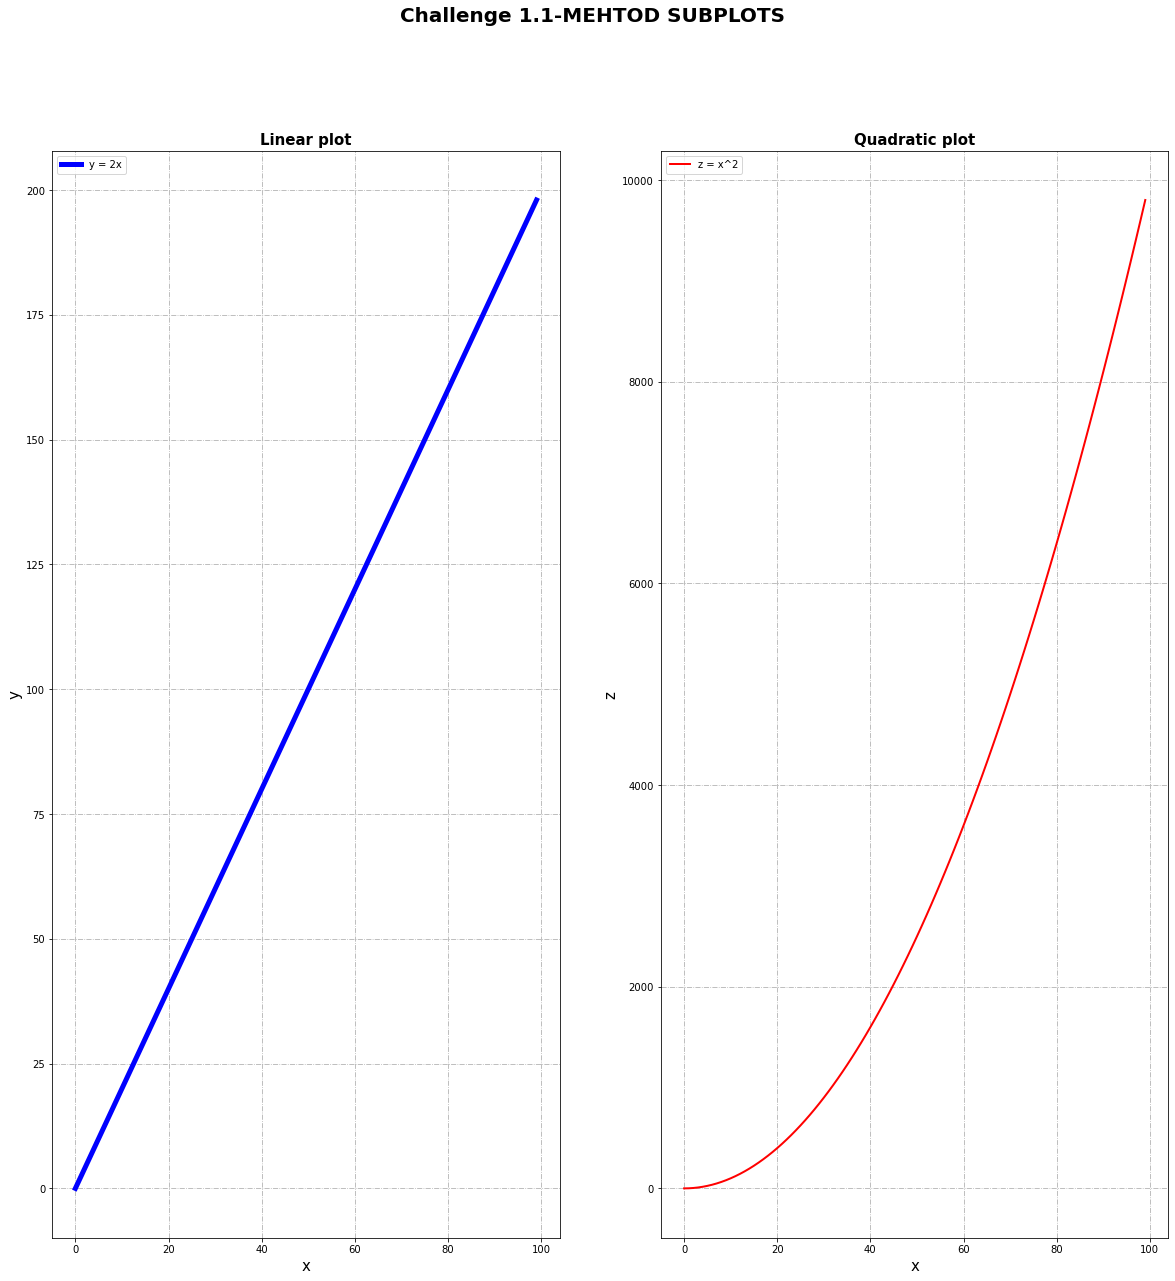

In [10]:
### METHOD 1 : with subplots

fig, ax = plt.subplots(1,2,figsize = (20,20))
fig.suptitle('Challenge 1.1-MEHTOD SUBPLOTS', fontsize=20, fontweight='bold')

# create first plot
ax[0].plot(x,y, c='blue', label='y = 2x',linewidth = 5)
ax[0].set_title('Linear plot', fontsize=15,fontweight='semibold')
ax[0].set_xlabel("x",fontsize=15)
ax[0].set_ylabel("y",fontsize=15)

# create second plot 
ax[1].plot(x,z, color='red', label='z = x^2',linewidth = 2 )
ax[1].set_title('Quadratic plot', fontsize=15,fontweight='semibold')
# ax[1].set(xlabel='x', ylabel='z')
ax[1].set_xlabel("x",fontsize=15)
ax[1].set_ylabel("z",fontsize=15)

# add grids 
ax[0].grid(True, linestyle='-.')
ax[1].grid(True, linestyle='-.')

ax[0].legend(loc = 'upper left')
ax[1].legend(loc = 'upper left')

# for a in ax:
#     a.legend(loc = 'upper left')

#### Now you will have to plot both $y=x^2$ and $y=e^x$ in the same plot. Create two subplots and use a normal scale in the first one and a logarithmic scale in the second one.
**Hint**: Use `set_xscale` and `set_yscale`.

As a bonus challenge, try to add a legend to the plot.

In [8]:
x = np.arange(0,100)
y1 = x**2
y2= np.exp(x)

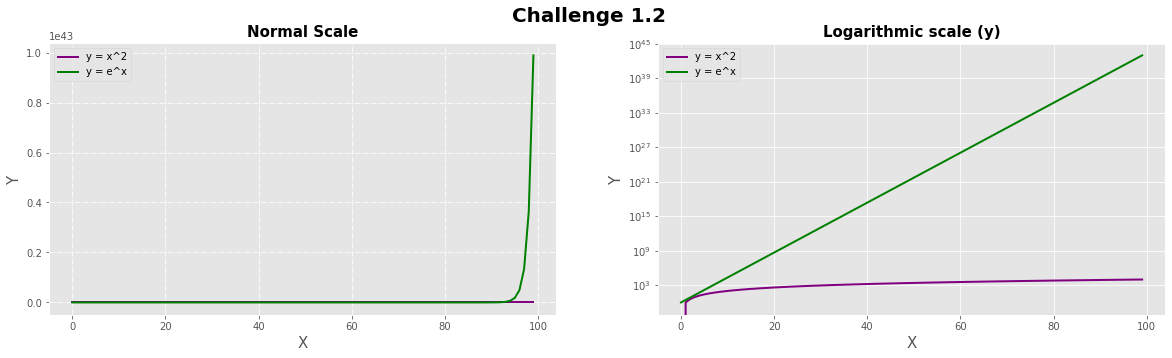

In [23]:
with plt.style.context('ggplot'):
    fig, ax = plt.subplots(1,2,figsize = (20,5))
    fig.suptitle('Challenge 1.2', fontsize=20, fontweight='bold')
    #when you set a style, it applies it to all your plots


    # create first plot
    ax[0].plot(x,y1, c='purple', label='y = x^2',linewidth = 2)
    ax[0].set_title('Normal Scale', fontsize=15,fontweight='semibold')
    ax[0].set_xlabel("X",fontsize=15)
    ax[0].set_ylabel("Y",fontsize=15)
    # ax[0].legend(loc = 'upper left')
    ax[0].grid(True, linestyle='-.')
    #second line in the same plot
    ax[0].plot(x,y2, c='green', label='y = e^x',linewidth = 2)


    # create second plot 
    ax[1].plot(x,y1, color='purple', label='y = x^2',linewidth = 2 )
    ax[1].set_title('Logarithmic scale (y)', fontsize=15,fontweight='semibold')
    ax[1].set_xlabel("X",fontsize=15)
    ax[1].set_ylabel("Y",fontsize=15)
    ax[1].grid(True, linestyle='-')
    #ax[1].legend(loc = 'upper left')
    #second line in the same plot
    ax[1].plot(x,y2, color='green', label='y = e^x',linewidth = 2 )

    #add logarithm y scale
    ax[1].set_yscale ('log')

    for a in ax:
        a.legend(loc = 'upper left')

## Challenge 2
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [25]:
fitbit = pd.read_csv("../data/Fitbit2.csv")

In [26]:
fitbit.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5


In [28]:
fitbit.Months.value_counts()

December     31
January      31
March        31
October      31
July         31
August       31
May          31
February     30
April        30
June         30
September    30
November     30
Name: Months, dtype: int64

#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays? All plots must be in the same jupyter notebook cell.

**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Use matplolib.pyplot object oriented API.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

In [ ]:
# your code here


#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

In [ ]:
# your code here



## Challenge 3

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [ ]:
# your code here


#### Explore the titanic dataset using Pandas dtypes.

In [ ]:
# your code here


#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [ ]:
# NUMERICAL VARIABLES
# your code here


In [ ]:
# CATEGORICAL VARIABLES
# your code here


#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

In [ ]:
# your code here 'search for plt set style'



#### Use the right visulalization to show the distribution of column `Age`.

In [ ]:
# your code here



#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

In [ ]:
# your code here 


#### How does the bin size affect your plot?

#### Use seaborn to show the distribution of column `Age`.

In [ ]:
# your code here


#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

In [ ]:
# Method 1 - matplotlib
# your code here


In [ ]:
# Method 2 - seaborn
# your code here


#### Use the right plot to visualize the column `Pclass`.

In [ ]:
# your code here


#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

In [ ]:
#sns.set_style('white')

In [ ]:
# your code here



#### What does the last plot tell you about the feature `Age`?

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

In [ ]:
# your code here


#### What additional information does the last plot provide about feature `Age`?

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

In [ ]:
# Method 1 - matplotlib
# your code here


In [ ]:
# Method 2 - seaborn 
# your code here 


#### Plot the correlation matrix using seaborn.

In [ ]:
# your code here 'there's a method for this' 


#### What are the most correlated features?

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

In [ ]:
# your code here


#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

In [ ]:
# your code here 
